In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft
%matplotlib inline
#The following code is used in order to plot the time-series data the take the FFT and plot that too#
#All that needs to be done is set FILE_NAME equal to the name of the file, e.g 'file.wav'#

In [3]:
#This is the only cell you need to change
#replace FILE_NAME with the name of the file
FILE_NAME = 'english4.wav' #make sure the name is the form of: 'file.wav'
#you will find your graphs saved as '.png' and '_FFT.png' of whatever FILE_NAME is set to, e.g 'file.wav.png' and 'file.wav_FFT.png'

Audio length: 35.97 seconds


C:\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


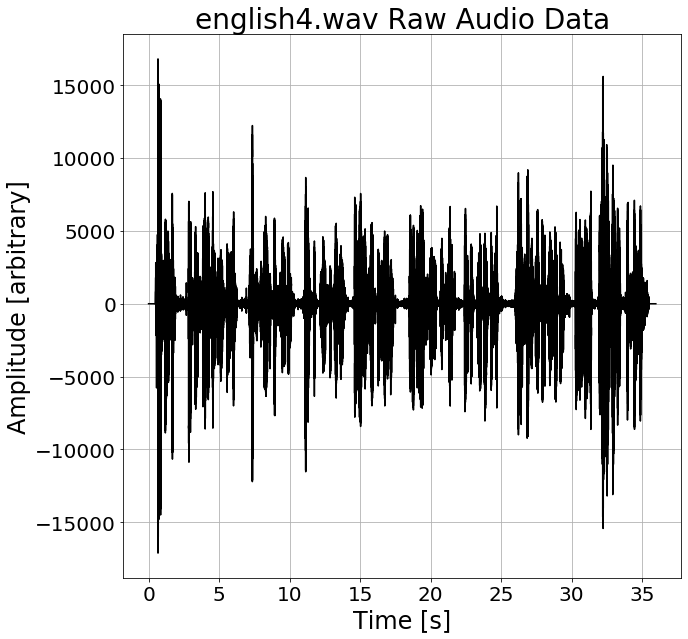

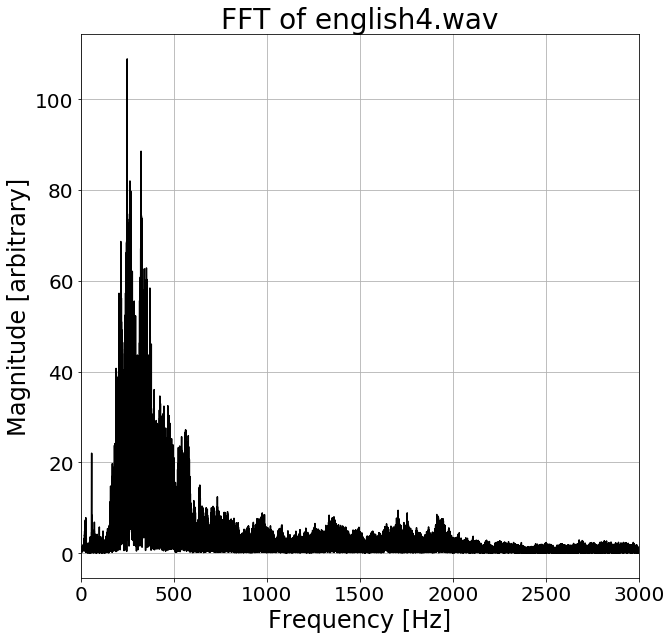

In [10]:
#Don't worry about this cell - all that needs to done is change the graph titles
rate, data = wav.read(FILE_NAME)
audio = np.mean(data, axis=1)
N = audio.shape[0]
L = N / rate
#This just tells us the exact length of the audio file
print(f'Audio length: {L:.2f} seconds')

#Plot of the raw time-series data
f, ax = plt.subplots(figsize=(10,10))
ax.plot(np.arange(N) / rate, audio, 'k')
plt.grid()
plt.xlabel('Time [s]', fontsize=24)
plt.ylabel('Amplitude [arbitrary]', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("%s Raw Audio Data"%FILE_NAME, fontsize=28)  #replace FILE_NAME
#ax.set_xlim(2, 5) #this allows you to change the x axis
plt.savefig('%s.png'%FILE_NAME)

n=len(audio)
T = 1/rate
yf = fft(audio)
xf=np.linspace(0.0, 1.0/(2.0*T), n/2)

#This is the FFT plot
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(xf, 2.0/n * np.abs(yf[:n//2]), 'k')
plt.grid()
plt.xlabel("Frequency [Hz]", fontsize=24)
plt.ylabel( "Magnitude [arbitrary]", fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("FFT of %s"%FILE_NAME, fontsize=28)
plt.xlim(0, 3000) #this allows you to change the x axis
plt.savefig('%s_FFT.png'%FILE_NAME)

In [ ]:
#References
#https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.html (https://bit.ly/3bmZw0Q)
#https://towardsdatascience.com/understanding-audio-data-fourier-transform-fft-spectrogram-and-speech-recognition-a4072d228520 (https://bit.ly/31JoJOI)
#https://www.dummies.com/programming/python/performing-a-fast-fourier-transform-fft-on-a-sound-file/ (https://bit.ly/31DUk40)
#